In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)
data_csv = pd.read_csv('commonlitreadabilityprize/train.csv')

print(data_csv.iloc[106])

id                                                        436ce79fe
url_legal                                                       NaN
license                                                         NaN
excerpt           The sun was shining in a cloudless sky, and no...
target                                                          0.0
standard_error                                                  0.0
Name: 106, dtype: object


In [3]:
data_csv.drop('url_legal', axis='columns', inplace=True) # Not needed right now
data_csv.drop('license', axis='columns', inplace=True) # Not needed right now
data_csv.drop(106, axis='rows', inplace=True) # value with 0.0 target and std error. Problematic.


In [4]:
data_csv

,id,excerpt,target,standard_error
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845
...,...,...,...,...
2829,25ca8f498,When you think of dinosaurs and where they liv...,1.711390,0.646900
2830,2c26db523,So what is a solid? Solids are usually hard be...,0.189476,0.535648
2831,cd19e2350,The second state of matter we will discuss is ...,0.255209,0.483866
2832,15e2e9e7a,Solids are shapes that you can actually touch....,-0.215279,0.514128


Text(0, 0.5, 'std_error')

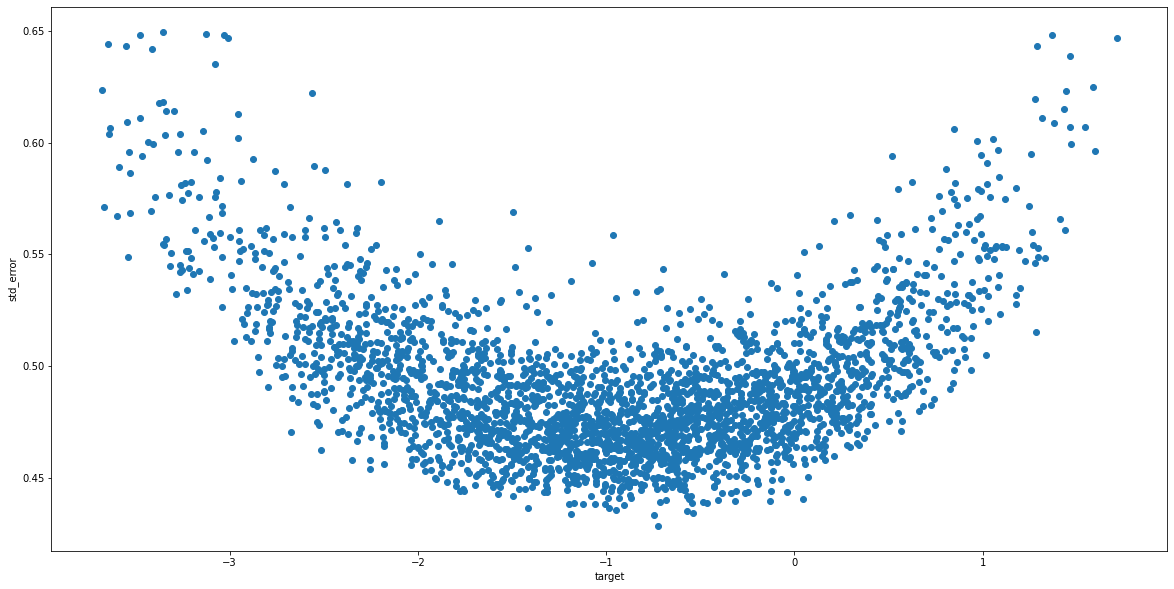

In [5]:
plt.scatter(data_csv['target'], data_csv['standard_error'])
plt.xlabel('target')
plt.ylabel('std_error')

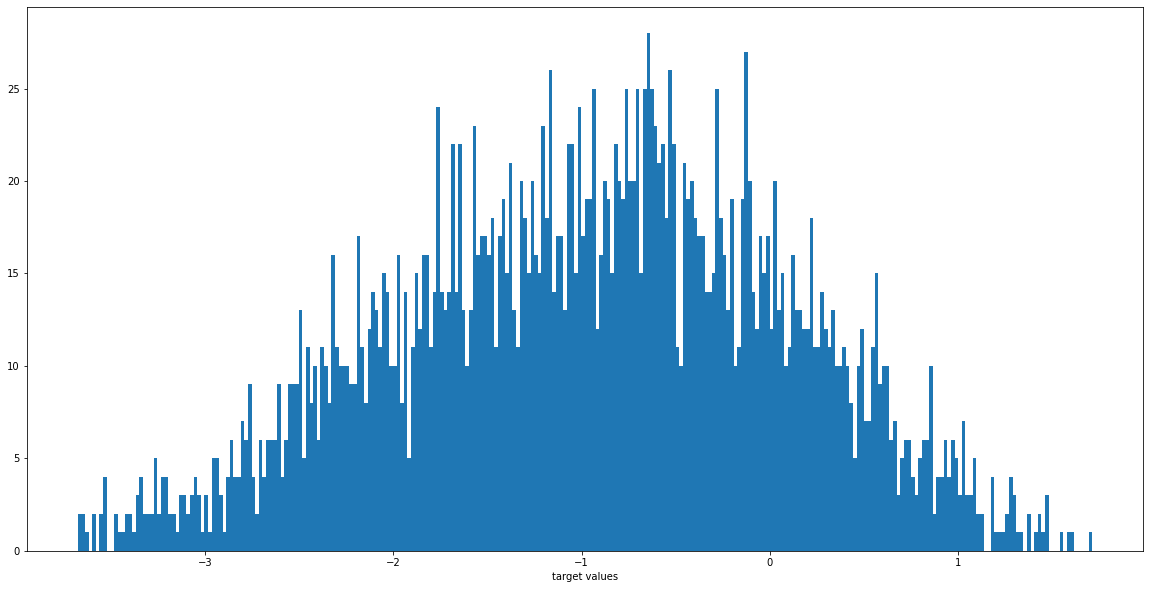

In [6]:
plt.hist(data_csv['target'], bins=280)
plt.xlabel('target values')
plt.show()

In [7]:
new_target = np.array(data_csv['target'])
new_std_error = np.array(data_csv['standard_error'])
new_std_error[np.where(new_std_error == 0)] = 1e-3
print(new_std_error.min())
new_target = (new_target - np.mean(new_target)) / new_std_error

0.428232657


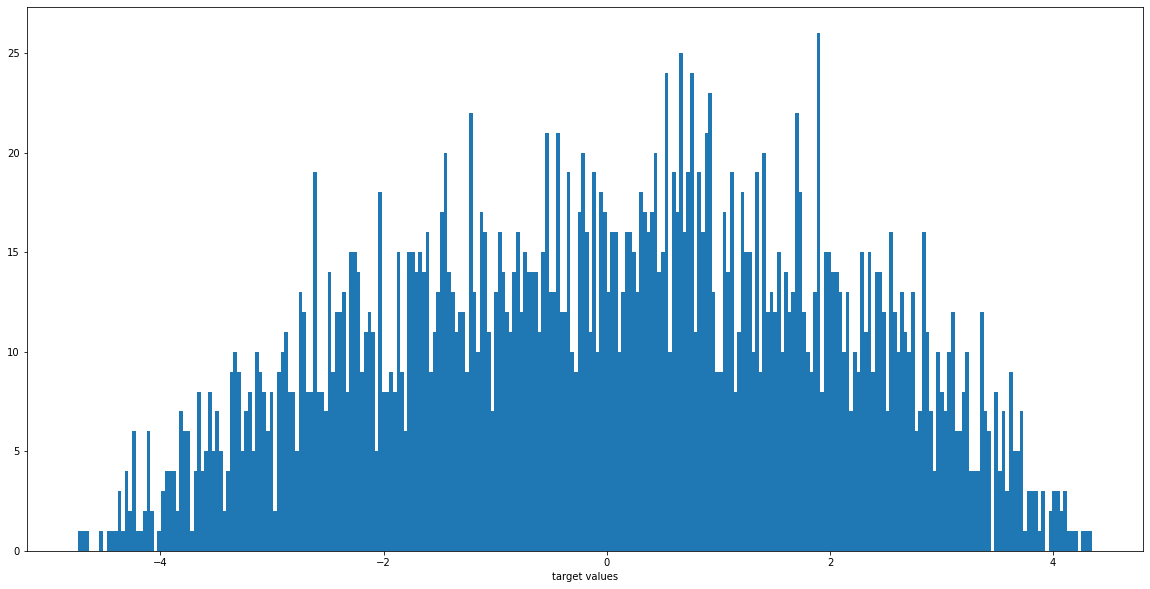

In [8]:
# Normalized dependent variable
plt.hist(new_target, bins=280)
plt.xlabel('target values')
plt.show()

In [9]:
data_csv.iloc[0]['excerpt']

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [10]:
new_phrase = data_csv.iloc[0]['excerpt'].replace('\n', '')

In [11]:
new_phrase

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.At each end of the room, on the wall, hung a beautiful bear-skin rug.These rugs were for prizes, one for the girls and one for the boys. And this was the game.The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.This would have been an easy matter, but each traveller was obliged to wear snowshoes.'